Export images to 128 x 128 size

In [1]:
import os
import numpy as np
import glob
import cv2
import pylab as pl
import matplotlib.cm as cm
%matplotlib inline

/home/julien/kaggle/venv/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
DATAPATH = '../data/data_clean2'

In [3]:
imgs_fnames = [os.path.basename(fname) for fname in glob.glob(DATAPATH + "/*.png") if 'mask' not in fname]

In [4]:
len(imgs_fnames)

5635

In [5]:
def load_and_preprocess(imgname):
    img_fname = imgname
    # extract patient number so we can do leave-patient-out CV
    pnumber, imnumber = os.path.splitext(imgname)[0].split('_')
    mask_fname = os.path.splitext(imgname)[0] + "_mask.png"
    img = cv2.imread(os.path.join(DATAPATH, img_fname), cv2.IMREAD_GRAYSCALE)
    mask = cv2.imread(os.path.join(DATAPATH, mask_fname), cv2.IMREAD_GRAYSCALE)
    
    #newsize = (img.shape[1] / 4, img.shape[0] / 4)
    newsize = (128, 128)
    img = cv2.resize(img, newsize)
    mask = cv2.resize(mask, newsize)
    mask = (mask > 128).astype(np.float32)
    
    # TODO: Could subtract mean as on fimg above
    img = img.astype(np.float32) / 255.0
    np.ascontiguousarray(img)
    return img, mask, int(pnumber)

# TODO: Note that this load in a different order (but we don't care since it's train) - see test below
imgs, masks, pids = zip(*[load_and_preprocess(fname) for fname in imgs_fnames])

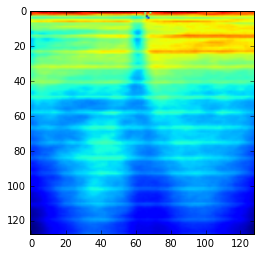

In [6]:
pl.imshow(np.mean(imgs, axis=0))

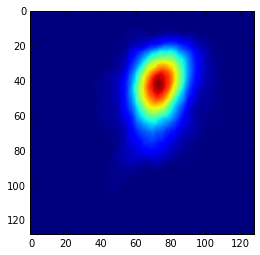

In [7]:
pl.imshow(np.mean(masks, axis=0))

In [8]:
X = np.array(imgs)
print X.shape
print X.nbytes / (1024. * 1024.)

(5635, 128, 128)
352.1875


In [9]:
Y = np.array(masks)
print X.shape
print X.nbytes / (1024. * 1024.)

(5635, 128, 128)
352.1875


In [10]:
pids = np.array(pids)

In [11]:
np.savez('../data/data_clean2_128_train.npz', X=X, Y=Y, pids=pids)